### 학습목표
- 선형회귀이론 및 선형회귀모델의 학습 알고리즘에 대해서 알수있다.
- LinearModel 을 활용하여 집값 예측해보자!
- 모델 학습을 위한 데이터 전처리 진행해보자~

- BX(Business Experience): 외국 주택 시장의 동향 및 가격 분석, 스마트 홈 시스템 설치환경 여부와 주택 가격의 상관관계 확인을 통해 스마트홈시스템 비즈니스 전략 수립, 스마트홈시스템의 대중화 및 초개인화
- CX: 외국 고객이 중요하게 생각하는 주택 특성(방의 수, 차고의 수, 크기, 위치 등)과 개인의 가치관(안전, 에너지절약, 건강, 디자인, 가족끼리 의사소통 등)을 반영한 스마트홈 시스템 경험
- DX: 외국 주택에 특화된 국외전용 스마트홈 앱 개발 및 외국주택 관리에 특화된 가전제품 개발(마당의 구조 및 시기를 반영한 잔디깎이 로봇, 스프링쿨러, 스마트벽난로 -> 난방시스템 등)

In [ ]:
# 1. 구글 마운트
# 2. 파일위치 변경
# 3. 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/인사교_컴퓨터비전A_머신러닝

/content/drive/MyDrive/Colab Notebooks/인사교_컴퓨터비전A_머신러닝


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 데이터 불러오기
data = pd.read_csv('./data/melb_data.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [5]:
data.shape
# 컬럼 정보
# 문제 데이터 / 독립 변수 - 20개(price를 제외한 나머지 컬럼)
# 정답 데이터 / 종속 변수 - 1개(price)

(13580, 21)

| 컬럼명        | 설명                                                                 |
|---------------|----------------------------------------------------------------------|
| Suburb        | 주택이 위치한 교외 지역의 이름                                         |
| Address       | 주택의 주소                                                          |
| Rooms         | 주택의 방 개수                                                       |
| Type          | 주택 유형 (h: 주택, u: 유닛, t: 타운하우스)                           |
| Price         | 주택 가격(호주 달러)                                                            |
| Method        | 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가격 공개) |
| SellerG       | 판매 대행 부동산 중개인의 이름                                        |
| Date          | 판매 날짜                                                            |
| Distance      | 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (킬로미터 단위)            |
| Postcode      | 우편번호                                                             |
| Bedroom2      | 주택의 침실 개수 (2개의 침실을 갖춘 주택)                             |
| Bathroom      | 주택의 욕실 개수                                                     |
| Car           | 주차 가능한 자동차 수                                                |
| Landsize      | 대지 면적 (평방 미터 단위)                                           |
| BuildingArea  | 건축 면적 (평방 미터 단위)                                           |
| YearBuilt     | 주택이 건축된 연도                                                   |
| CouncilArea   | 관할 구역                                                           |
| Lattitude     | 주택의 위도                                                          |
| Longtitude    | 주택의 경도                                                          |
| Regionname    | 지역 이름                                                            |
| Propertycount | 지역 내의 부동산 개수                                                |


In [6]:
# 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
# 결측치가 있는 특성 확인
# sort_values() : value값을 기준으로 정렬을 해줘라!
# ascending : 오름차순 / 내림차순 정리
# True - 오름차순 정렬(기본값)
# Fales - 내림차순 정렬
data.isnull().sum().sort_values(ascending = False)
# BuildingArea, YearBuilt, CouncilArea, Car 결측치 존재

,0
BuildingArea,6450
YearBuilt,5375
CouncilArea,1369
Car,62
Suburb,0
Price,0
Type,0
Rooms,0
Address,0
Distance,0


In [8]:
# 부동소수점 형태의 데이터를 일반숫자로 설정
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
# 기술통계량 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,"13,580.00",2.94,0.96,1.00,2.00,3.00,3.00,10.00
Price,"13,580.00","1,075,684.08","639,310.72","85,000.00","650,000.00","903,000.00","1,330,000.00","9,000,000.00"
Distance,"13,580.00",10.14,5.87,0.00,6.10,9.20,13.00,48.10
Postcode,"13,580.00","3,105.30",90.68,"3,000.00","3,044.00","3,084.00","3,148.00","3,977.00"
Bedroom2,"13,580.00",2.91,0.97,0.00,2.00,3.00,3.00,20.00
Bathroom,"13,580.00",1.53,0.69,0.00,1.00,1.00,2.00,8.00
Car,"13,518.00",1.61,0.96,0.00,1.00,2.00,2.00,10.00
Landsize,"13,580.00",558.42,"3,990.67",0.00,177.00,440.00,651.00,"433,014.00"
BuildingArea,"7,130.00",151.97,541.01,0.00,93.00,126.00,174.00,"44,515.00"
YearBuilt,"8,205.00","1,964.68",37.27,"1,196.00","1,940.00","1,970.00","1,999.00","2,018.00"


### EDA 탐색적 데이터 분석

- 주택 타입별 가격 확인

In [12]:
data['Type'].unique()
# h : 주택
# u : 유닛
# t : 타운하우스

array(['h', 'u', 't'], dtype=object)

In [14]:
# 주택 타입별 가격 평균 확인 -> groupby
data[['Type', 'Price']].groupby(['Type']).mean()

,Price
Type,
h,"1,242,664.76"
t,"933,735.05"
u,"605,127.48"


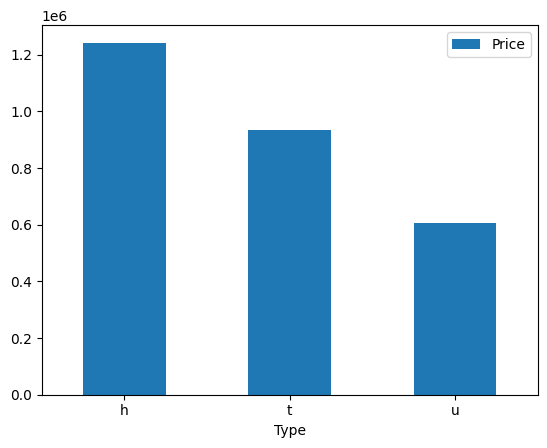

In [15]:
# 시각화
data[['Type', 'Price']].groupby(['Type']).mean().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

- 방의 개수에 따른 가격

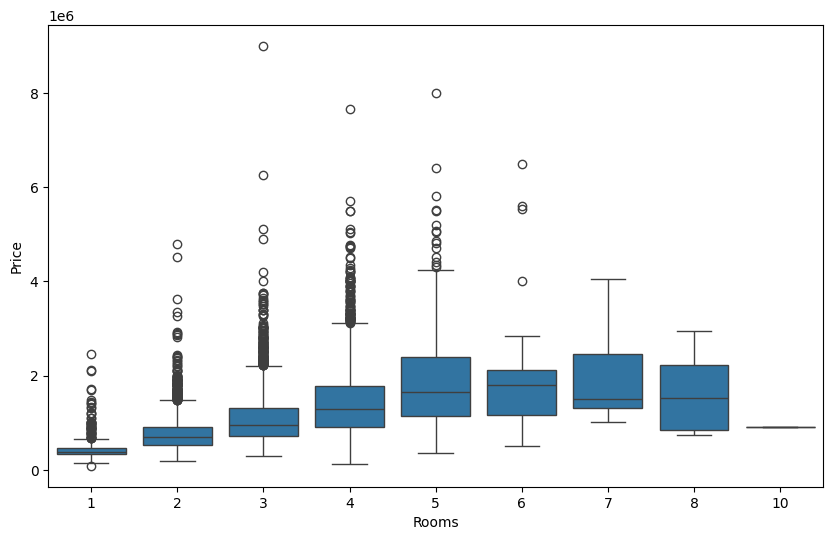

In [16]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Rooms', y = 'Price', data = data) # 박스플롯 / 윗수염아랫수염 그래프 - 사분위수 / 중앙값 / 평균값
plt.show()
# 방의 갯수가 5개까지는 계속해서 가격 증가
# 방 갯수 6개 부터는 가격에 영향을 미치지 않는다 -> 값이 떨어지고 있다.
# 현재 데이터 특성 -> 이상치 상대적으로 많음. -> 이상치 처리를 할 수없는 데이터
# 호주 멜버른 실제 집값을 데이터로 넣어둔 부분임. 집값의 이상치를 잡을시 실제 집값을 제대로 표현할 수 없다
# 현재 데이터를 그려주는 그래프는 이상치를 판단하기보다 분포를 보는데 활용하자.

- pairplot 그래프 구조
  - 대각선: 변수의 히스토그램 -> 변수의 분포 확인
  - 나머지: 변수 간의 산점도가 위치 -> 두변수간의 분포 확인

- 산점도 분석결과
  - Rooms: 방의 개수가 많을수록 가격이 증가 -> 양의 상관관계
  - Bedroom2 : 침실의 개수가 많을수록 가격도 증가 -> 방의 개수 보다는 크게 영향력을 미치는 편이 아님
  - Lattitude: -37.8 부근에 가까울수록 가격이 높은 경향 -> 위도가 낮아질수록 가격도 낮아지는 경향
  - Distance : 거리가 증가할수록 가격은 감소하는 경향 (음의상관관계), 중심지에서 가까운 주택이 높은가격 유지

- 주의
  - 다중공선성: 독립변수간에 높은 상관관계를 가지는 경우 -> 회귀분석의 모델링에서 문제발생 가능성이 있음
  - 회귀분석 및 선형모델에서는 독립변수들이 서로 독립적일수록 결과를 도출하기가 쉬움

- 결측치 처리하기

1. 위도경도 데이터를 통해서 비슷한 위치 -> 비슷한 관할구역? 추론
2. 우편번호
3. 중개인이름
4. 지역이름
5. Suburb
  - 소규모 도시 내에 특정 동네
  - 주택시장 -> 지역을 구분하거나 설명할때 사용되는 가장 세분화된 단위중 하나

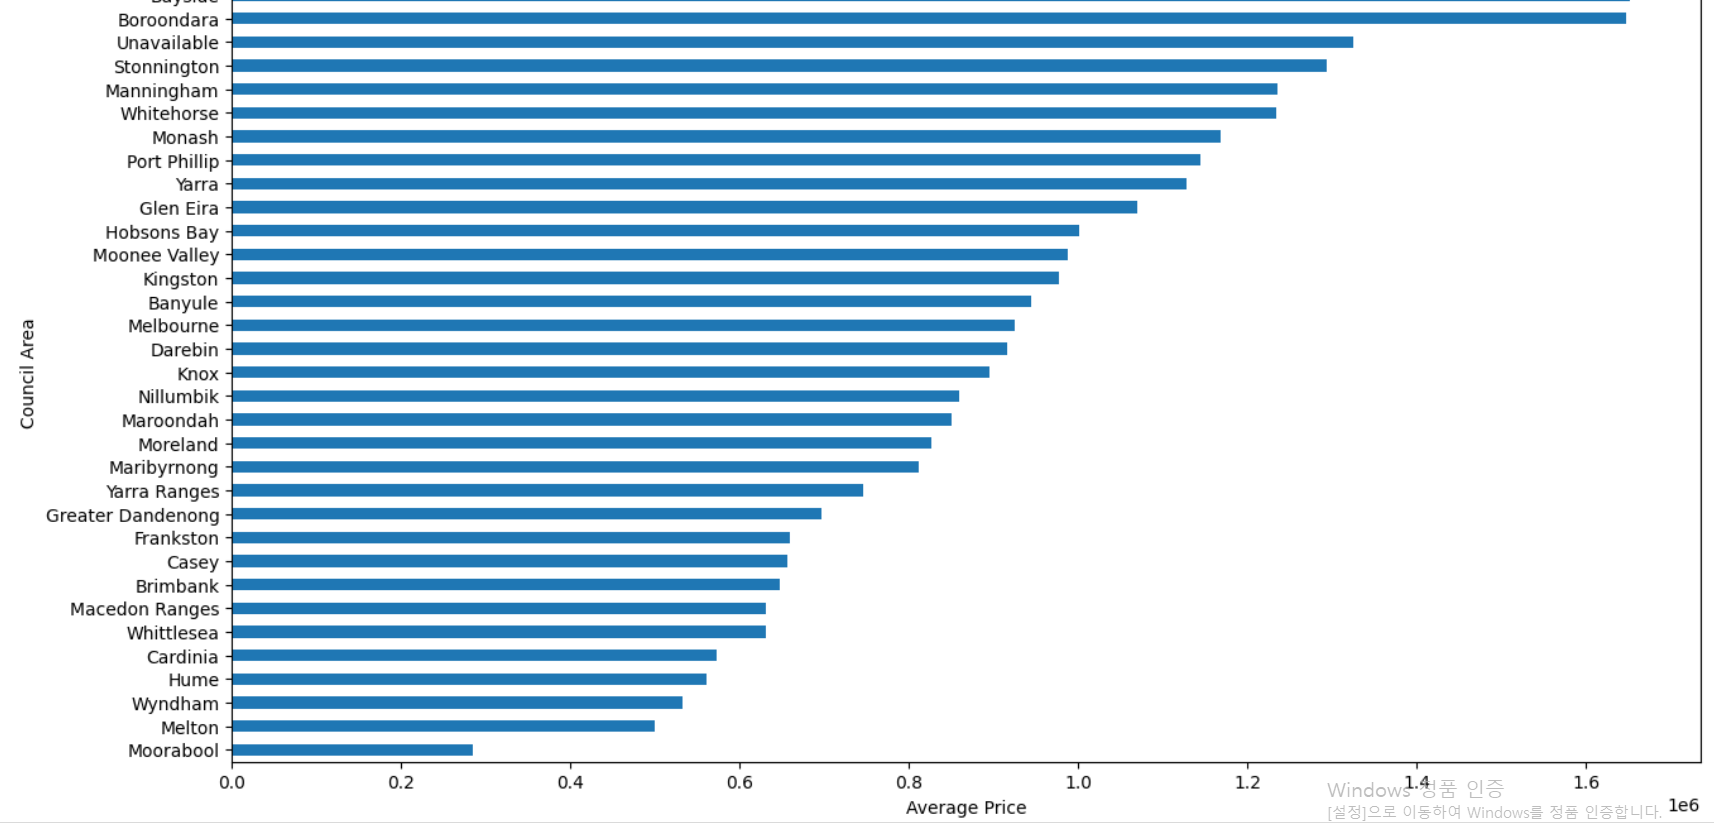

#### 결측치를 채우는 방법
1. 컬럼 삭제
  - 결측치의 비율이 높을때
  - 컬럼의 특성이 정답에 영향을 적게 미칠때
2. 기술통계량을 통한 채우기
  - 평균, 중앙값, 최빈값
3. 특수값으로 대체
  - 결측치 자체가 의미를 가지는 경우 -> 특수값으로 대체 후 정답과의 상관관계 파악
4. 다른 컬럼과의 연관성 파악 -> 데이터 유추

- car 컬럼의 결측치 채워보기
  - 결측치를 채우기 위한 참고컬럼 설정
  - Type, Rooms 컬럼을 활용하여 결측치 채워보자!

### 모델링

- 상관관계를 확인하여 가격에 영향을 많이 미치는 컬럼을 선별

### 데이터 전처리
- 문자형 -> 수치형 (인코딩)
- 인코딩 방법 2가지
  - One-Hot Encoding
    - 데이터끼리 우선순위가 없을때 단순 0과1로 수치형변환
  - Label Encoding
    - 데이터 내에서 우선순위를 주고 싶을때
    - ex) 연봉예측시 직급을 수치화할때 (사장,부장, 과장, 대리, 사원) -> 큰숫자를 매핑할수록 우선순위가 높다!

- 각 가중치의 영향을 해석
  - Rooms : 147175.28 -> 방의 개수가 1씩 증가할때 주택가격이 증가 하는 것을 의미
    - 양의 값이기 때문에 방의개수는 주택가격에 긍정적인 영향을 미친다~
  - Distance
    - 음의 값이기 때문에 거리가 커질수록 (중심지에서 멀어짐) 주택가격에 부정적인 영향을 미친다~
- 숫자가 클수록 주택가격에 큰 영향을 미치는 것을 의미

### 회귀모델의 평가지표
- 분류는 'accuracy 정확도' 지표를 대표적으로 활용한다
  - 정답데이터가 범주형 -> 전체데이터에서 맞은 개수를 확률로 표현
  - 정확도 0~1 사이의 숫자로 출력
  - 1에 가까울수록 좋은 모델
- 회귀는 오차기반의 평가 오차가 얼마나 적냐,크냐 에 따라서 모델의 성능을 평가한다
  - mse(평균제곱오차, mean_squeard_error)
    - mse 지표는 학습, 평가 모두 사용된다

### 선형회귀모델의 평가지표 4가지
- MSE: 평균제곱오차 (mean_squared_error)
  - 오차가 작을수록 잘예측하는 성능좋은 모델
- RMSE : mse 루트를 씌운것
  - 해석시 단위문제를 해결하기 위해 mse 에 루트를 씌워 수치를 정상화
- MAE : 평균절댓값오차
  - 오차를 절댓값으로 변환해서 평균을 구한값 -> 오차에 덜 민감 (mse에비해)
- R2 Score : 오차와 평균값을 활용하여 정규화된 평가를 가능하게끔 만들어놓은 평가 지표
  - 0~1 사이의 값을 가지며
  - 0에 가까울수록 평균적인 모델로 성능이 좋지 않음을 의미
  - 1에 가까울수록 좋은 성능의 모델이다!
  - 음수: 성능이 매우 좋지 않은 모델

- 호주지역의 사는 사람이라면 위의 오차가 큰지 작은지 판별할 수 있으니 우리는 47만달러가 잘맞췄는지 못 맞췄는지 알수가 없다
- 회귀모델은 오차기반으로 평가를 진행
- 회귀모델을 균일하게 공통적으로 평가할수 있는 방법?
  - 0 ~ 1 사이의 값으로 정규화하도록 만들놓은 방법 score 함수 결과값
  - R2 score , R square, 결정계수

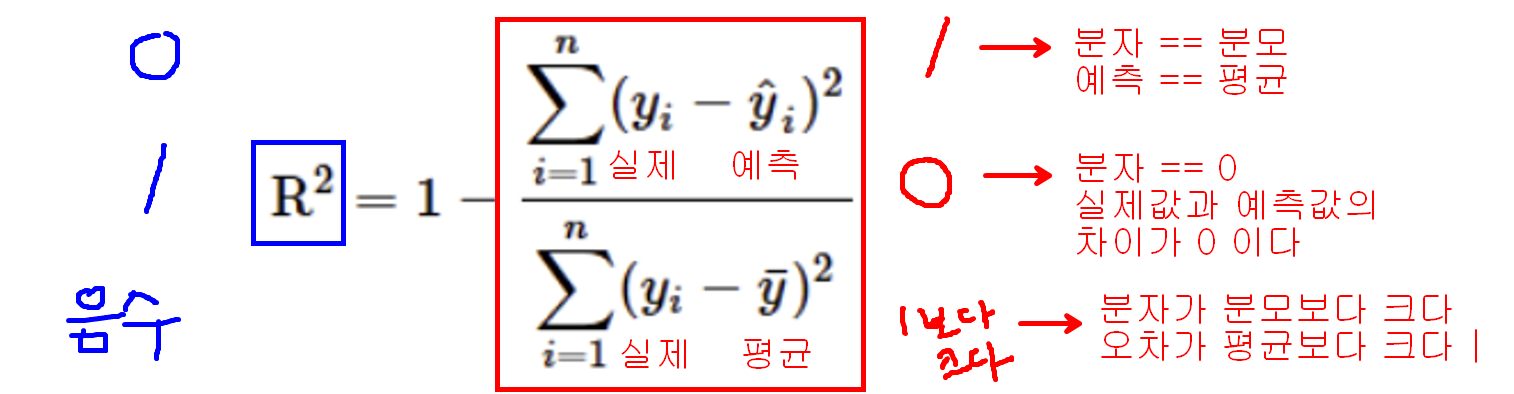

- R2 Score : 오차와 평균값을 활용하여 정규화된 평가를 가능하게끔 만들어놓은 평가 지표
  - 0~1 사이의 값을 가지며
  - 0에 가까울수록 평균적인 모델로 성능이 좋지 않음을 의미
  - 1에 가까울수록 좋은 성능의 모델이다!
  - 음수: 성능이 매우 좋지 않은 모델

### 회귀모델평가지표
- MSE
- RMSE
- MAE
- R2score